In [1]:
import numpy as np
import tsaug
from tsaug.visualization import plot

import time
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

window_size = 10
X = np.load('normalized/Norm_MinMax_%02d_X.npy' % window_size)
y = np.load('normalized/Norm_MinMax_%02d_y.npy' % window_size)

labels = np.unique(y)

le = LabelEncoder()
le.fit(y)
le_y = np.array(le.transform(y))
le_y = le_y.reshape((-1, 1))

ohe = OneHotEncoder()
ohe.fit(le_y)

y = ohe.transform(le_y).toarray()

In [2]:
X = np.reshape(X, (X.shape[0], X.shape[1] * X.shape[2]))

In [3]:
X.shape

(2069, 160)

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

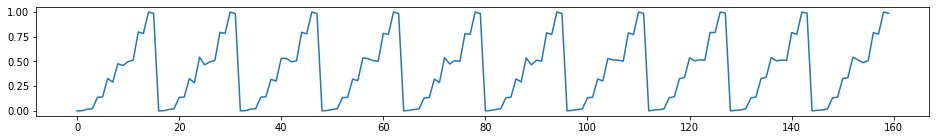

In [4]:
plot(X[0])

## 1. AddNoise
Add random noise to time series.

The noise added to every time point of a time series is independent and identically distributed.

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

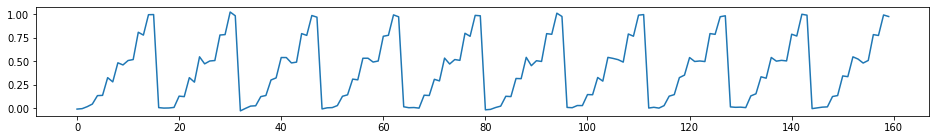

In [5]:
X_AddNoise = tsaug.AddNoise(scale=0.01).augment(X[0])
plot(X_AddNoise)

## 2. Convolve
Convolve time series with a kernel window.

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

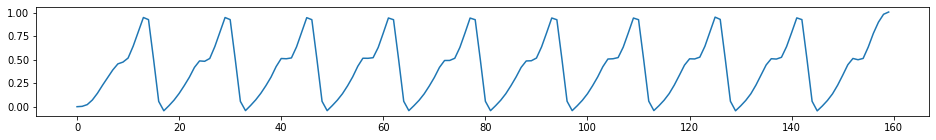

In [6]:
X_Convolve = tsaug.Convolve(window="flattop", size=10).augment(X[0])
plot(X_Convolve)

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

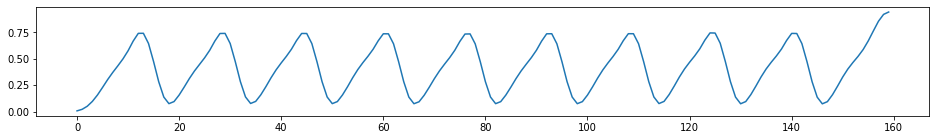

In [7]:
X_Convolve = tsaug.Convolve(window="hann", size=10).augment(X[0])
plot(X_Convolve)

## 3. Reverse
Reverse the time line of series.

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

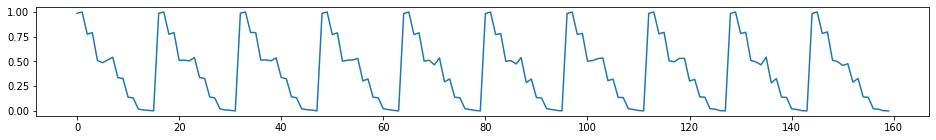

In [8]:
X_Reverse = tsaug.Reverse().augment(X[0])
plot(X_Reverse)

## 4. TimeWarp
Random time warping.

The augmenter random changed the speed of timeline. The time warping is controlled by the number of speed changes and the maximal ratio of max/min speed.

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

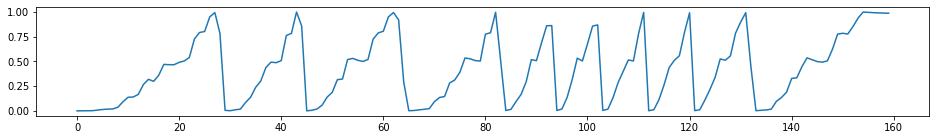

In [9]:
X_TimeWarp = tsaug.TimeWarp(n_speed_change=5, max_speed_ratio=3).augment(X[0])
plot(X_TimeWarp)

## 5. Drift
Drift the value of time series.

The augmenter drifts the value of time series from its original values randomly and smoothly. The extent of drifting is controlled by the maximal drift and the number of drift points.

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

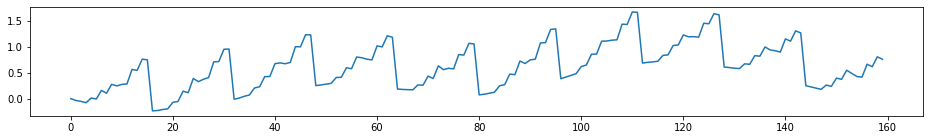

In [10]:
X_Drift = tsaug.Drift(max_drift=0.7, n_drift_points=5).augment(X[0])
plot(X_Drift)

## 6. Dropout
Dropout values of some random time points in time series.

Single time points or sub-sequences could be dropped out.

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

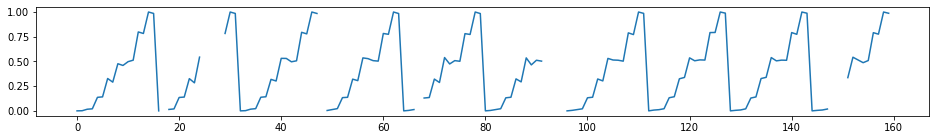

In [11]:
X_Dropout = tsaug.Dropout(p=0.1, size=(1,5), fill=float("nan"), per_channel=True).augment(X[0])
plot(X_Dropout)

## 7. Pool
Reduce the temporal resolution without changing the length.

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

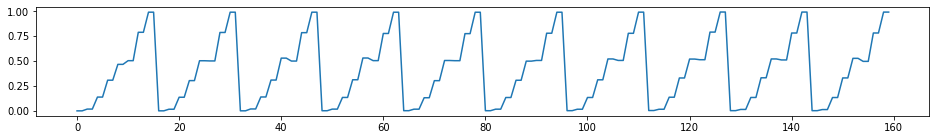

In [12]:
X_Pool = tsaug.Pool(size=2).augment(X[0])
plot(X_Pool)

## 8. Quantize
Quantize time series to a level set.

Values in a time series are rounded to the nearest level in the level set.

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

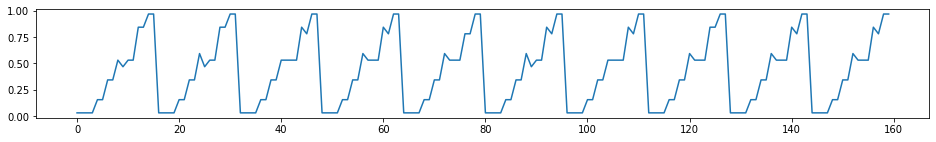

In [13]:
X_Quantize = tsaug.Quantize(n_levels=16).augment(X[0])
plot(X_Quantize)

## 9. Resize
Change the temporal resolution of time series.

The resized time series is obtained by linear interpolation of the original time series.

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

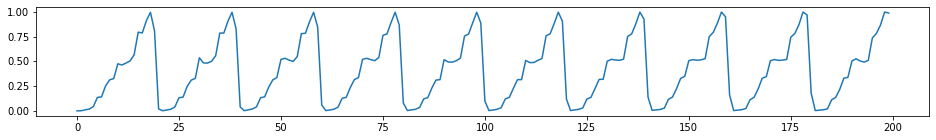

In [14]:
X_Resize = tsaug.Resize(size=200).augment(X[0])
plot(X_Resize)

## 10. Crop
Crop random sub-sequences from time series.

To guarantee all output series have the same length, if the crop size is not deterministic, all crops must be resize to a fixed length.

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

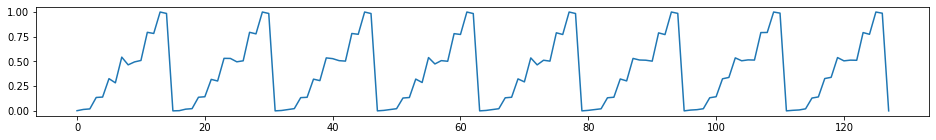

In [15]:
X_Crop = tsaug.Crop(size=128).augment(X[0])
plot(X_Crop)